<a href="https://colab.research.google.com/github/harip5814/Machine-Learning/blob/main/Group_19_Landslide_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install detectron2

In [1]:
if(1):
  !pip install -U torch torchvision
  !pip install git+https://github.com/facebookresearch/fvcore.git
  import torch, torchvision
  torch.__version__
  !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
  !pip install -e detectron2_repo


  !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
  !pip install 'git+https://github.com/facebookresearch/detectron2.git'  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/11.8.0/torch/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ci95i663
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ci95i663
  Resolved https://github.com/facebookresearch/detectron2.git to commit d4a5f28e01b2babbaba9f90198fb95f5c661cccd
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=7419684 sha256=ba0a95b8a00f40fb3c7cb3389835bf3f449a268bb1c8aeb926e37c4801483320
  Stored in directory: /tmp/pip-ephem-wheel-cache-etj5ys7l/wheels/47/e5/15/94c80df2ba85500c5d76599cc307c0a7079d0e221bb6fc4375
Successfully built detectron2
  Att

In [13]:
# download, decompress the data
example1 = 1
example2 = 0

# https://drive.google.com/file/d/1URnB0Frg_NFu6qe2TX5Wcr2BcU-0YO5z/view?usp=share_link
if(example1): #example 1
  !gdown 1URnB0Frg_NFu6qe2TX5Wcr2BcU-0YO5z
  !unzip landslide.zip

num_iter = 2

Downloading...
From: https://drive.google.com/uc?id=1URnB0Frg_NFu6qe2TX5Wcr2BcU-0YO5z
To: /content/landslide.zip
100% 2.37M/2.37M [00:00<00:00, 16.0MB/s]
Archive:  landslide.zip
replace test_images/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test_images/0.jpg       
  inflating: test_images/1.jpg       
  inflating: test_images/10.jpg      
  inflating: test_images/11.jpg      
  inflating: test_images/12.jpg      
  inflating: test_images/13.jpg      
  inflating: test_images/14.jpg      
  inflating: test_images/15.jpg      
  inflating: test_images/16.jpg      
  inflating: test_images/17.jpg      
  inflating: test_images/18.jpg      
  inflating: test_images/19.jpg      
  inflating: test_images/2.jpg       
  inflating: test_images/3.jpg       
  inflating: test_images/4.jpg       
  inflating: test_images/5.jpg       
  inflating: test_images/6.jpg       
  inflating: test_images/7.jpg       
  inflating: test_images/8.jpg       
  inflating: test_images/9.jpg   

In [14]:
if(0):
  !pip install pyyaml==5.1

  import torch
  TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
  CUDA_VERSION = torch.__version__.split("+")[-1]
  print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
  # Install detectron2 that matches the above pytorch version
  # See https://detectron2.readthedocs.io/tutorials/install.html for instructions
  !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
  !pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [15]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
try:
  import detectron2
except:
  import detectron2
  
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Train on a custom COCO dataset

Register the dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).


In [16]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("mydataset1", {}, "./train_images/annotation.json", "./train_images")
my_metadata = MetadataCatalog.get("mydataset1")
dataset_dicts = DatasetCatalog.get("mydataset1")

[05/14 14:20:07 d2.data.datasets.coco]: Loaded 20 images in COCO format from ./train_images/annotation.json


To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:



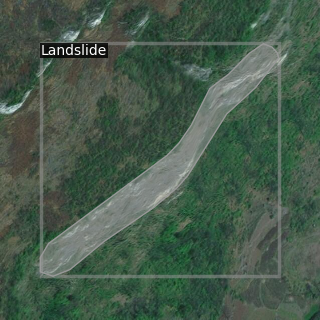

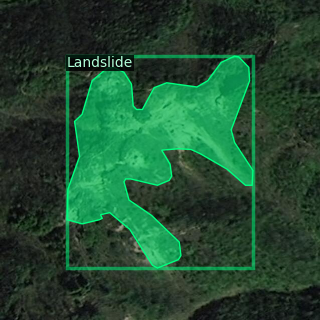

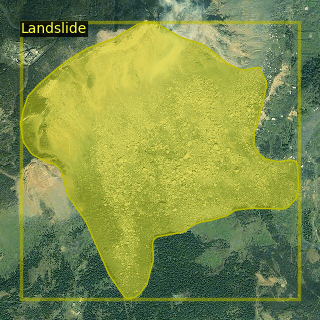

In [17]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_metadata,scale=.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# get the number of classes

In [18]:
import json

# load the JSON file
with open('train_images/annotation.json', 'r') as f:
    coco_data = json.load(f)

# extract the categories field
categories = coco_data['categories']

# get the number of categories
num_classes = len(categories)

print('Number of classes:', num_classes)

Number of classes: 1


Now, let's fine-tune a coco-pretrained R50-FPN Mask R-CNN model on the dataset. 


In [19]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.MODEL.DEVICE = 'cpu'
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("mydataset1",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = num_iter   
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512  
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[05/14 14:20:53 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[05/14 14:20:54 d2.engine.train_loop]: Starting training from iteration 0
[05/14 14:23:39 d2.utils.events]:  iter: 1  total_loss: 1.46  loss_cls: 0.6298  loss_box_reg: 0.1227  loss_mask: 0.6932  loss_rpn_cls: 0.003349  loss_rpn_loc: 0.01115    data_time: 0.3574  last_data_time: 0.0297   lr: 0.00012512  
[05/14 14:23:39 d2.engine.hooks]: Total training time: 0:00:01 (0:00:01 on hooks)


#download the model

In [20]:
#download the converted image folder
if(1):
  from google.colab import files
  files.download("output/model_final.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now, we perform inference with the trained model on the fruits_nuts dataset. First, let's create a predictor using the model we just trained:



In [22]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("mydataset1", )
predictor = DefaultPredictor(cfg)

[05/14 14:24:22 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


# Evaluating model performance using the test_images

In [23]:
import json
from detectron2.utils.visualizer import ColorMode
from skimage.draw import polygon2mask
from sklearn import metrics

def segmentation_to_xy(segmentation):
    xy_coords = []
    for i in range(0, len(segmentation[0]), 2):
        y = segmentation[0][i]
        x = segmentation[0][i+1]
        xy_coords.append([x,y])
    return xy_coords

def calculate_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union
    return iou

y_true = []
y_pred = []

# load the JSON file
with open('test_images/annotation.json', 'r') as f:
    coco_data = json.load(f)

# extract the images and annotations fields
images = coco_data['images']
annotations = coco_data['annotations']

# create a dictionary to store annotations by image ID
ann_by_img_id = {}
for ann in annotations:
    img_id = ann['image_id']
    if img_id not in ann_by_img_id:
        ann_by_img_id[img_id] = []
    ann_by_img_id[img_id].append(ann)

# create a dictionary to map category IDs to their names
categories = coco_data['categories']
cat_id_to_name = {}
for cat in categories:
    cat_id_to_name[cat['id']] = cat['name']

# iterate through the list of images and extract information
for image in images:
    image_id = image['id']
    file_name = image['file_name']
    width = image['width']
    height = image['height']

    # get the segmentation information for this image
    if image_id in ann_by_img_id:
        segmentation = []
        for ann in ann_by_img_id[image_id]:
            seg_info = {
                'segmentation': ann['segmentation'],
                'category_id': cat_id_to_name[ann['category_id']]
                # 'category_id': ann['category_id']
            }
            segmentation.append(seg_info)
    else:
        segmentation = []

    # do something with the information, such as print it
    # print(f"Image ID: {image_id}, File Name: {file_name}, Width: {width}, Height: {height}, Segmentation: {segmentation}")

    pred_matched_index = []

    #load the image and make prediction
    im = cv2.imread("test_images/"+file_name)
    outputs = predictor(im)
    instances = outputs['instances']
    
    pred_index = [i for i in range(len(instances))]

    # Create an empty image
    d_height = height
    d_width = width    
    img = np.zeros((d_height, d_width), dtype=np.uint8)      

    #loop through ground truth
    # for gt_anno in d['annotations']:
    for seg in segmentation:
      class_label_gt = seg['category_id']      
      polygon_gt = np.array(seg['segmentation'])
      

      # Convert the float coordinates to integers
      polygon_gt = polygon_gt.astype(np.int32)        
      polygon_gt = segmentation_to_xy(polygon_gt) 

      mask_gt = polygon2mask(img.shape, polygon_gt)
      # Convert the binary segmentation mask to a matrix
      mask_gt = np.where(mask_gt > 0, True, False)

      matched=0
      # Loop over the predicted instances and extract properties for each instance
      for i in range(len(instances)):
          # Get the class label for the instance
          class_label_pre = my_metadata.thing_classes[instances.pred_classes[i].cpu().item()]
          
          # Get the segmentation mask for the instance
          mask_pre = instances.pred_masks[i].cpu().numpy()

          if calculate_iou(mask_gt, mask_pre)>=0.5 and class_label_gt==class_label_pre:
            pred_matched_index.append(i)
            matched = 1
            break 

      #check if this ground truth object has been matched
      if matched ==1:
        y_true.append(class_label_gt)
        y_pred.append(class_label_pre)
      else:
        y_true.append(class_label_gt)
        y_pred.append(-1)

    #check if there is any predicted objects that have not been matched.
    for i in list(set(pred_index) - set(pred_matched_index)):
      # y_pred.append(name_pred.cpu().item())
      y_pred.append(my_metadata.thing_classes[instances.pred_classes[i].cpu().item()])
      y_true.append(-2)

metrics.classification_report(y_true, y_pred, output_dict=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

{'-1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0},
 '-2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 903.0},
 'Landslide': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 21.0},
 'accuracy': 0.0,
 'macro avg': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 924.0},
 'weighted avg': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 924.0}}

#plot predicted objects

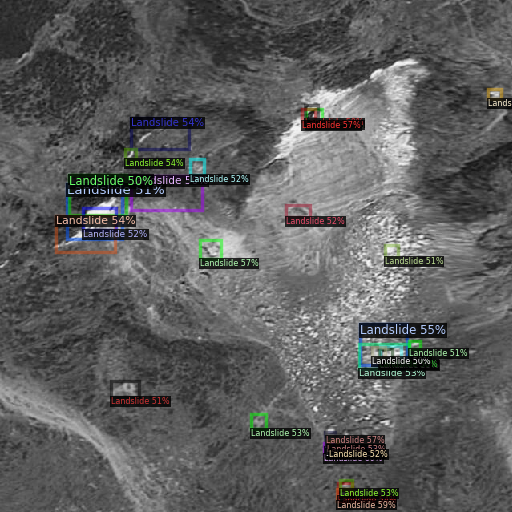

In [24]:
from detectron2.utils.visualizer import ColorMode

# for d in random.sample(dataset_dicts, 3): 
for d in dataset_dicts[:1]:       
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=my_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"])
    cv2_imshow(v.get_image()[:, :, ::-1])

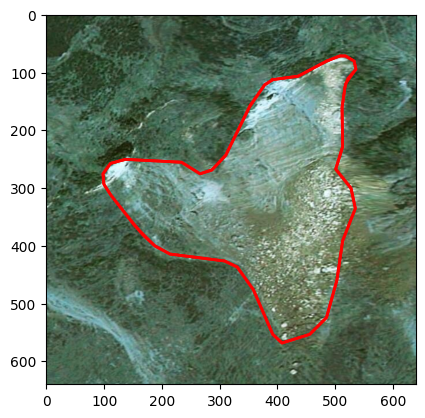

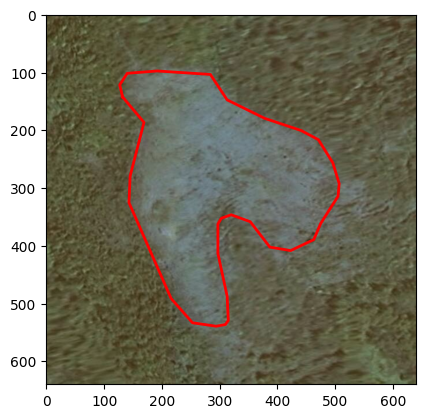

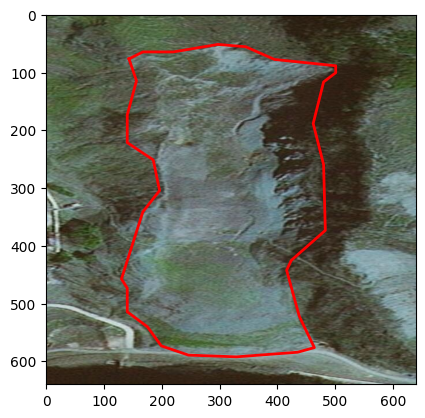

In [25]:
from detectron2.utils.visualizer import ColorMode
from skimage.draw import polygon2mask
from skimage.draw import polygon

def segmentation_to_xy(segmentation):
    xy_coords = []
    for i in range(0, len(segmentation[0]), 2):
        y = segmentation[0][i]
        x = segmentation[0][i+1]
        xy_coords.append([x,y])        
    return xy_coords


def calculate_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union
    return iou


# load the JSON file
with open('test_images/annotation.json', 'r') as f:
    coco_data = json.load(f)

# extract the images and annotations fields
images = coco_data['images']
annotations = coco_data['annotations']

# create a dictionary to store annotations by image ID
ann_by_img_id = {}
for ann in annotations:
    img_id = ann['image_id']
    if img_id not in ann_by_img_id:
        ann_by_img_id[img_id] = []
    ann_by_img_id[img_id].append(ann)

# create a dictionary to map category IDs to their names
categories = coco_data['categories']
cat_id_to_name = {}
for cat in categories:
    cat_id_to_name[cat['id']] = cat['name']

# iterate through the list of images and extract information
# for image in images[:3]:
for image in random.sample(images, 3):
    image_id = image['id']
    file_name = image['file_name']
    width = image['width']
    height = image['height']

    # get the segmentation information for this image
    if image_id in ann_by_img_id:
        segmentation = []
        for ann in ann_by_img_id[image_id]:
            seg_info = {
                'segmentation': ann['segmentation'],
                'category_id': cat_id_to_name[ann['category_id']]
                # 'category_id': ann['category_id']
            }
            segmentation.append(seg_info)
    else:
        segmentation = []

    # do something with the information, such as print it
    # print(f"Image ID: {image_id}, File Name: {file_name}, Width: {width}, Height: {height}, Segmentation: {segmentation}")

    pred_matched_index = []

    #load the image and make prediction
    im = cv2.imread("test_images/"+file_name)
    outputs = predictor(im)
    instances = outputs['instances']
    
    pred_index = [i for i in range(len(instances))]

    # Create an empty image
    d_height = height
    d_width = width    
    img = np.zeros((d_height, d_width), dtype=np.uint8)  

    plt.imshow(im)    

    #loop through ground truth
    # for gt_anno in d['annotations']:
    for seg in segmentation:
      class_label_gt = seg['category_id']      
      polygon_gt = np.array(seg['segmentation'])
      

      # Convert the float coordinates to integers
      polygon_gt = polygon_gt.astype(np.int32)        
      polygon_gt = segmentation_to_xy(polygon_gt) 

      # Define polygon vertices
      vertices = np.array(polygon_gt)

      # Create polygon
      rr, cc = polygon(vertices[:, 0], vertices[:, 1])

    # Plot image and polygon    
      plt.plot(vertices[:, 1], vertices[:, 0], color='r', linewidth=2, fillstyle='none')
    plt.show()





   